# Climate Change Analysis using Global Temperature Data

In [11]:
!pip install plotly

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import streamlit as st


In [12]:
# Step 2: Load Data
file_path = "GlobalTemperatures.csv"
df = pd.read_csv(file_path)

In [13]:
# Step 3: Preprocessing
df['dt'] = pd.to_datetime(df['dt'])
df = df.sort_values('dt')
df['Year'] = df['dt'].dt.year

In [14]:
# Step 4: Handle Missing Values
df = df.dropna(subset=['LandAverageTemperature'])

In [15]:
# Step 5: Aggregate by Year
temp_by_year = df.groupby('Year')['LandAverageTemperature'].mean().reset_index()

C:\Users\abhij\anaconda3\envs\flask\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abhij\anaconda3\envs\flask\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


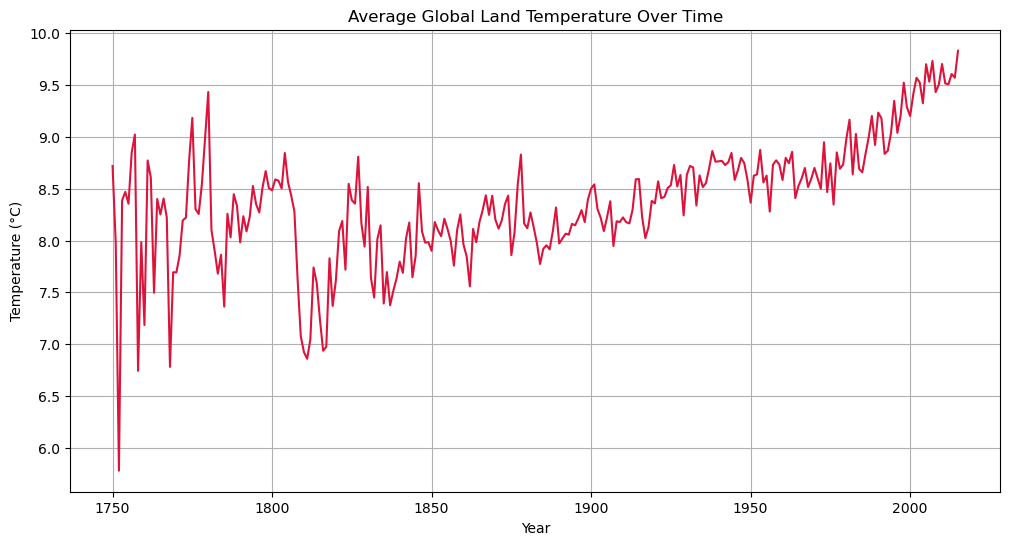

In [16]:
# Step 6: Visualization - Temperature Trend
plt.figure(figsize=(12,6))
sns.lineplot(data=temp_by_year, x='Year', y='LandAverageTemperature', color='crimson')
plt.title('Average Global Land Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

C:\Users\abhij\anaconda3\envs\flask\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abhij\anaconda3\envs\flask\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


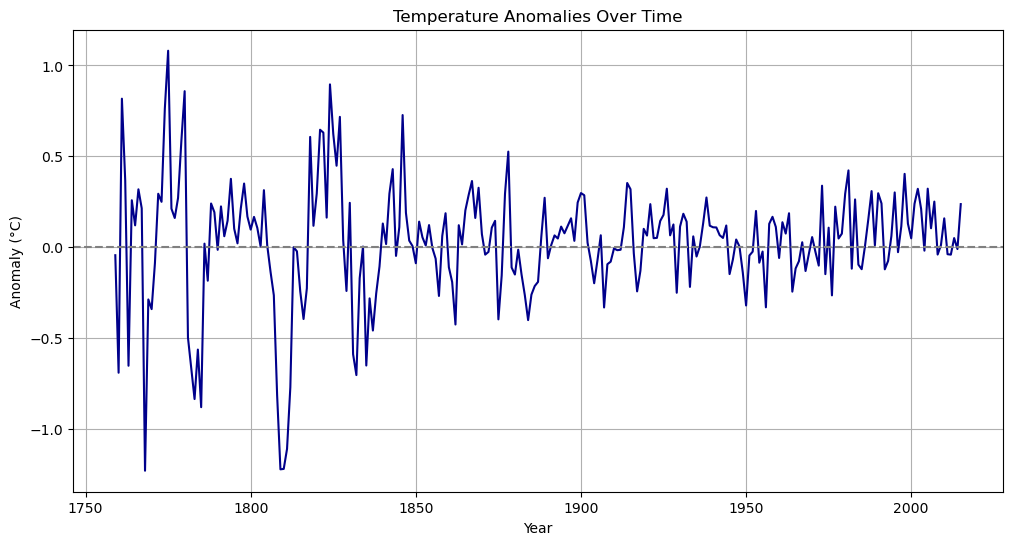

In [17]:
# Step 7: Anomaly Detection
rolling_mean = temp_by_year['LandAverageTemperature'].rolling(window=10).mean()
temp_by_year['anomaly'] = temp_by_year['LandAverageTemperature'] - rolling_mean

plt.figure(figsize=(12,6))
sns.lineplot(data=temp_by_year, x='Year', y='anomaly', color='darkblue')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Temperature Anomalies Over Time')
plt.xlabel('Year')
plt.ylabel('Anomaly (°C)')
plt.grid(True)
plt.show()

### Optional: Streamlit App
Save the code snippet below as `streamlit_app.py` and run using: `streamlit run streamlit_app.py`

In [18]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("GlobalTemperatures.csv")
df['dt'] = pd.to_datetime(df['dt'])
df['Year'] = df['dt'].dt.year
df = df.dropna(subset=['LandAverageTemperature'])
temp_by_year = df.groupby('Year')['LandAverageTemperature'].mean().reset_index()

st.title("Global Climate Change Analysis")
st.line_chart(temp_by_year.rename(columns={"LandAverageTemperature": "Average Temperature"}).set_index("Year"))
st.write("### Summary Statistics")
st.write(temp_by_year.describe())
st.write("Data Source: [Kaggle](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data)")

2025-05-15 20:03:13.981 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-15 20:03:13.981 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-15 20:03:14.133 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-15 20:03:14.134 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-15 20:03:14.135 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-15 20:03:14.135 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-15 20:03:14.158 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-15 20:03:14.159 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [19]:
# Step 9: Save Processed Data for Tableau
output = temp_by_year[['Year', 'LandAverageTemperature']]
output.to_csv("average_temperature_by_year.csv", index=False)
print("Saved average temperature data for Tableau.")

Saved average temperature data for Tableau.
